# Import Required Libraries
Import the necessary libraries, including pandas and matplotlib.

In [1]:
# Import Required Libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load Titanic Dataset
Load the Titanic dataset using pandas.

In [2]:
# Load Titanic Dataset
titanic_data = pd.read_csv('titanic.csv')  # Load the Titanic dataset from a CSV file
titanic_data.head()  # Display the first few rows of the dataset to verify loading

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Plot Fare Distribution
Create a histogram to plot the distribution of fares paid by passengers.

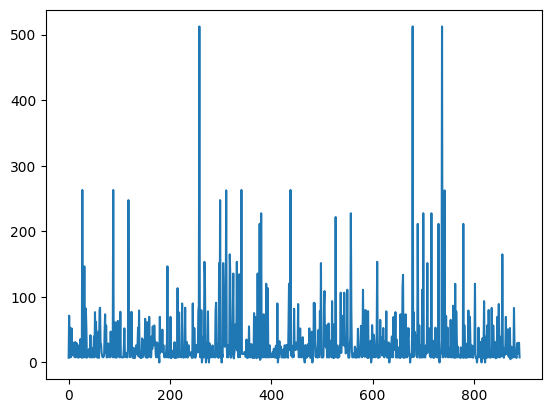

In [12]:
plt.plot(titanic_data.Fare)
plt.show()

(0.0, 300.0)

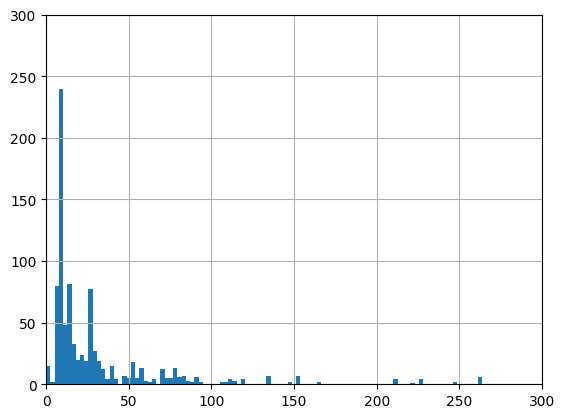

In [13]:
titanic_data.Fare.hist(bins = 200) # try different numbers of bins
plt.xlim(0,300)               # setting limit on x-axis
plt.ylim(0,300)               # setting limit on y-axis

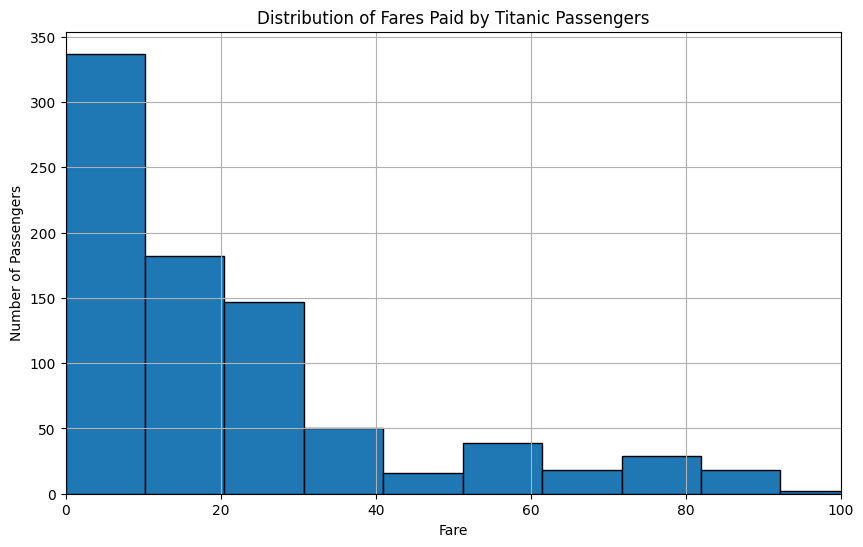

np.int64(336)

In [3]:
# Plot Fare Distribution
plt.figure(figsize=(10, 6))  # Set the figure size
plt.hist(titanic_data['Fare'], bins=50, edgecolor='k')  # Create a histogram of the 'Fare' column
plt.xlim(0, 100)  # Set the x-axis limit to 100
plt.xlabel('Fare')  # Label the x-axis
plt.ylabel('Number of Passengers')  # Label the y-axis
plt.title('Distribution of Fares Paid by Titanic Passengers')  # Set the title of the plot
plt.grid(True)  # Enable grid for better readability
plt.show()  # Display the plot

# Count how many people paid 10 or less
num_people_paid_10_or_less = (titanic_data['Fare'] <= 10).sum()
num_people_paid_10_or_less  # Output the count

# Reduce x-axis Limit
Adjust the x-axis limit to focus on fares up to 50.

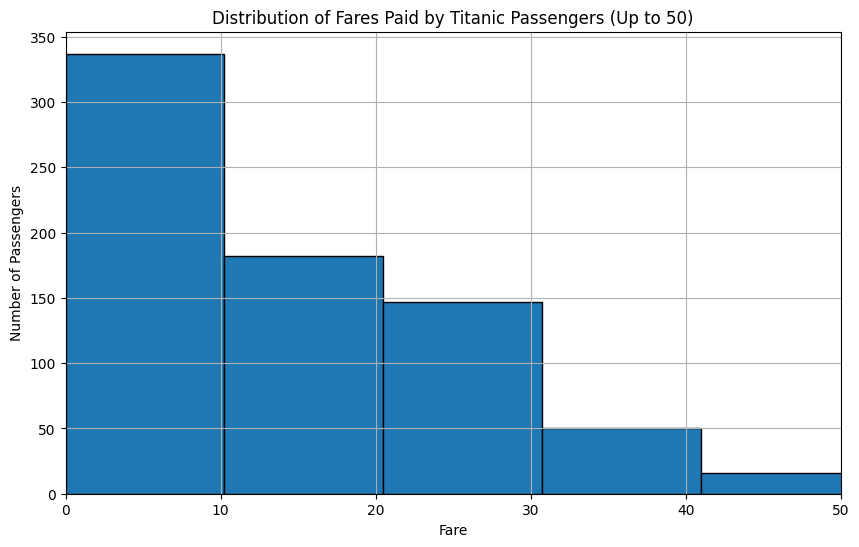

In [4]:
# Reduce x-axis Limit
plt.figure(figsize=(10, 6))  # Set the figure size
plt.hist(titanic_data['Fare'], bins=50, edgecolor='k')  # Create a histogram of the 'Fare' column
plt.xlim(0, 50)  # Set the x-axis limit to 50
plt.xlabel('Fare')  # Label the x-axis
plt.ylabel('Number of Passengers')  # Label the y-axis
plt.title('Distribution of Fares Paid by Titanic Passengers (Up to 50)')  # Set the title of the plot
plt.grid(True)  # Enable grid for better readability
plt.show()  # Display the plot

# Count People Who Paid 10 or Less
Count the number of passengers who paid 10 or less for their fare.

In [6]:
# Count People Who Paid 10 or Less
num_people_paid_10_or_less = (titanic_data['Fare'] <= 10).sum()
num_people_paid_10_or_less  # Output the count
print(num_people_paid_10_or_less)  # Output the count

336


# Boxplot
Use pandas to create a boxplot of the 'Fare' column.

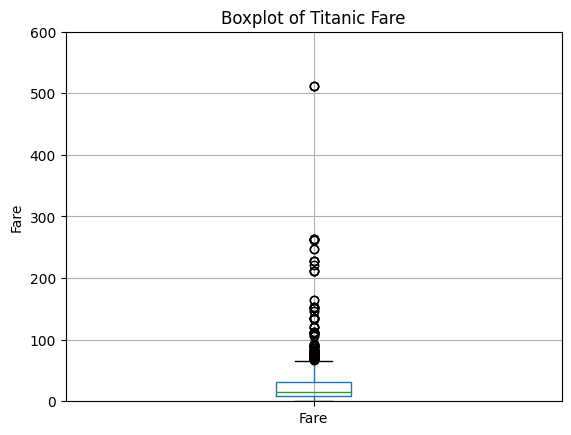

In [8]:
# Create Boxplot
titanic_data.boxplot(column='Fare')
plt.ylim(0, 600)  # setting limit on y-axis
plt.title('Boxplot of Titanic Fare')
plt.ylabel('Fare')
plt.show()

(0.0, 600.0)

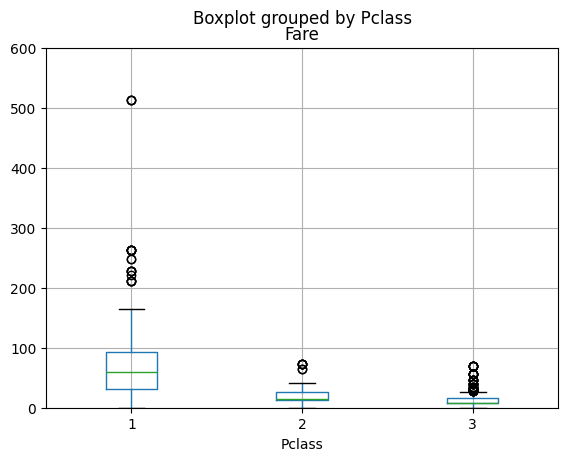

In [9]:
titanic_data.boxplot(column='Fare', by = "Pclass")
plt.ylim(0, 600)  # setting limit on y-axis

(0.0, 200.0)

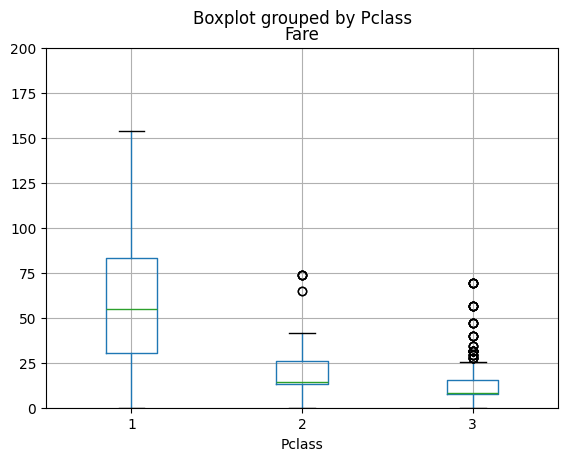

In [16]:
filt = ~((titanic_data['Pclass'] == 1) & (titanic_data['Fare'] > 160))
titanic_data = titanic_data[filt]
titanic_data.boxplot(column = 'Fare', by = 'Pclass')
plt.ylim(0, 200)

(0.0, 200.0)

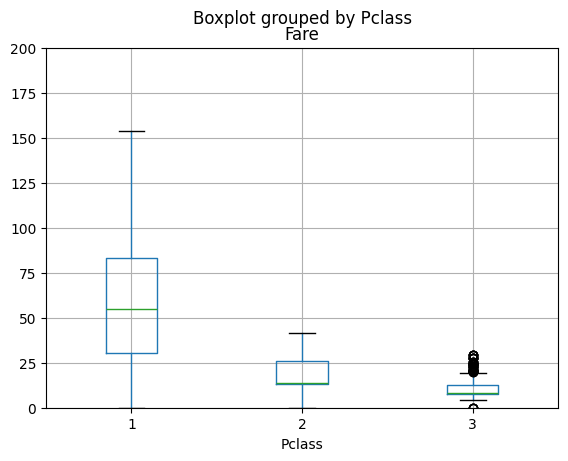

In [17]:
filt = ~((titanic_data['Pclass'] == 1) & (titanic_data['Fare'] > 160))
titanic_data = titanic_data[filt]
filt2 = ~((titanic_data['Pclass'] == 2) & (titanic_data['Fare'] > 50))
titanic_data = titanic_data[filt2]
filt3 = ~((titanic_data['Pclass'] == 3) & (titanic_data['Fare'] > 30))
titanic_data = titanic_data[filt3]
titanic_data.boxplot(column = 'Fare', by = 'Pclass')
plt.ylim(0, 200)

(0.0, 10.0)

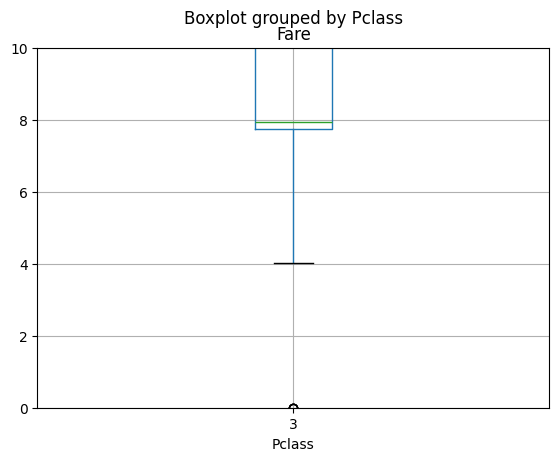

In [19]:
filt=(titanic_data['Pclass'] == 3) 
titanic_data = titanic_data[filt]
titanic_data.boxplot(column = 'Fare', by = 'Pclass')
plt.ylim(0, 10)

# Bar Chart

In [33]:
def child_count(x):
    return sum(e<18 for e in x)

def adult_count(x):
    return sum(e>=18 for e in x)

In [34]:
titanic_data = pd.read_csv('titanic.csv')

In [35]:
groupbyClass2 = titanic_data.groupby('Pclass').agg({'Age':[child_count, adult_count]})
groupbyClass2

Age            
       child_count adult_count
Pclass                        
1               12         174
2               23         150
3               78         277

In [36]:
groupbyClass2 = groupbyClass2.reset_index()
groupbyClass2.columns = groupbyClass2.columns.droplevel(0)
groupbyClass2.rename(columns = {'':'class'},inplace = True)
groupbyClass2

,class,child_count,adult_count
0,1,12,174
1,2,23,150
2,3,78,277


Text(0.5, 1.0, 'Passengers ticket class based on their adulthood')

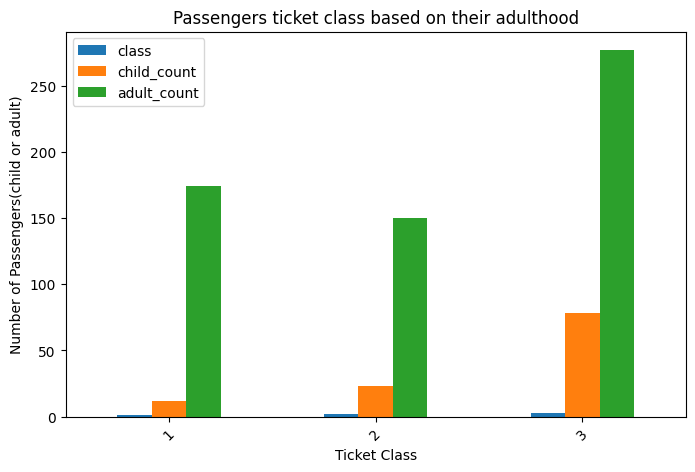

In [37]:
ax=groupbyClass2.plot.bar(figsize=(8,5))
ax.set_xticklabels(groupbyClass2['class'],rotation=45)
plt.xlabel('Ticket Class')
plt.ylabel('Number of Passengers(child or adult)')
plt.title('Passengers ticket class based on their adulthood')

# Pie Chart

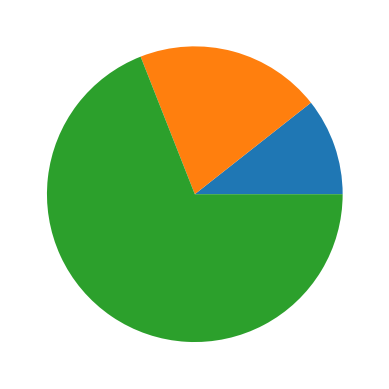

In [50]:
#plt.pie(groupbyClass2['child_count'], labels = groupbyClass2['class'], autopct='%1.1f%%', startangle=90)
plt.pie(groupbyClass2['child_count'])
plt.show()

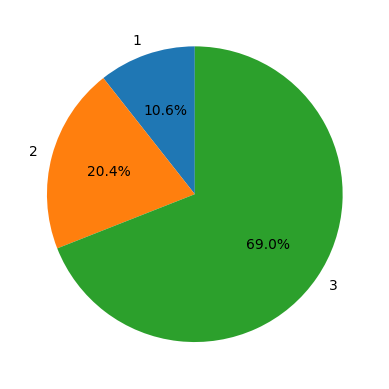

In [52]:
plt.pie(groupbyClass2['child_count'], labels = groupbyClass2['class'], autopct='%1.1f%%', startangle=90)
plt.show()

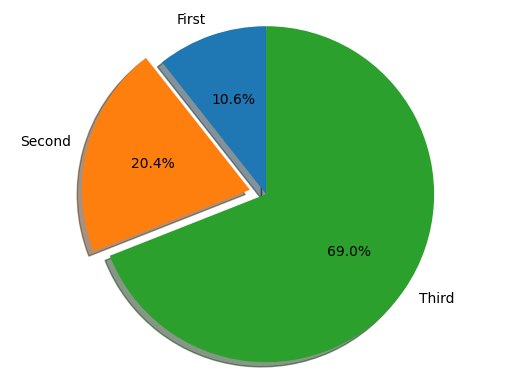

In [54]:
labels = 'First', 'Second', 'Third'
explode = (0, 0.1, 0)  # only "explode" 2nd class
fig1, ax1 = plt.subplots()
ax1.pie(groupbyClass2['child_count'], explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

# Scatter Plot

In [55]:
df = pd.DataFrame({
    'Name' : ['Mike','Aaron','Brad','Steve','George','Mitchell','Shaun','Glenn','Pat','Robert','David'],
    'Age' : [39,28,44,25,32,33,31,26,22,25,28],
    'Runs' :[1310,662,1403,828,672,1140,655,1040,557,1030,1140]
})
df

,Name,Age,Runs
0,Mike,39,1310
1,Aaron,28,662
2,Brad,44,1403
3,Steve,25,828
4,George,32,672
5,Mitchell,33,1140
6,Shaun,31,655
7,Glenn,26,1040
8,Pat,22,557
9,Robert,25,1030


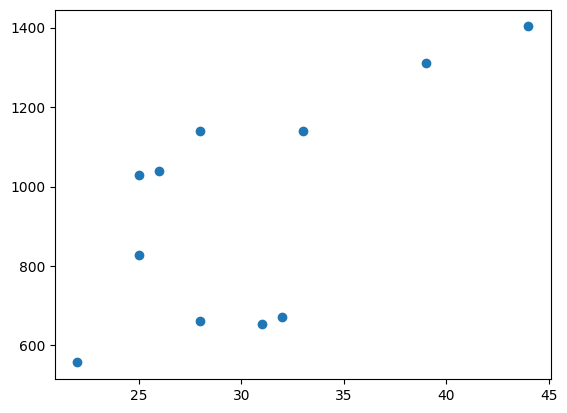

In [56]:
plt.scatter(df['Age'], df['Runs'])
plt.show()

In [62]:
df = pd.read_fwf('patients.txt', widths=[3,1,10,3,3,3,3,1], header=None)

In [63]:
df.columns = ['ID','Gender','Visit','HR','SBP','DBP','DX','AE']

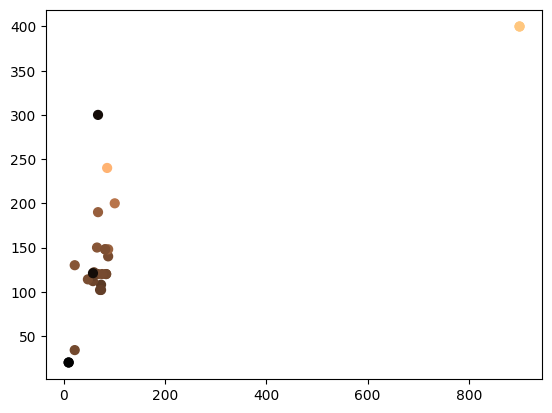

In [64]:
plt.scatter(df['HR'],df['SBP'], c=df['DBP'], s=40, cmap='copper')

In [65]:
plt.colormaps()

['magma',
 'inferno',
 'plasma',
 'viridis',
 'cividis',
 'twilight',
 'twilight_shifted',
 'turbo',
 'berlin',
 'managua',
 'vanimo',
 'Blues',
 'BrBG',
 'BuGn',
 'BuPu',
 'CMRmap',
 'GnBu',
 'Greens',
 'Greys',
 'OrRd',
 'Oranges',
 'PRGn',
 'PiYG',
 'PuBu',
 'PuBuGn',
 'PuOr',
 'PuRd',
 'Purples',
 'RdBu',
 'RdGy',
 'RdPu',
 'RdYlBu',
 'RdYlGn',
 'Reds',
 'Spectral',
 'Wistia',
 'YlGn',
 'YlGnBu',
 'YlOrBr',
 'YlOrRd',
 'afmhot',
 'autumn',
 'binary',
 'bone',
 'brg',
 'bwr',
 'cool',
 'coolwarm',
 'copper',
 'cubehelix',
 'flag',
 'gist_earth',
 'gist_gray',
 'gist_heat',
 'gist_ncar',
 'gist_rainbow',
 'gist_stern',
 'gist_yarg',
 'gnuplot',
 'gnuplot2',
 'gray',
 'hot',
 'hsv',
 'jet',
 'nipy_spectral',
 'ocean',
 'pink',
 'prism',
 'rainbow',
 'seismic',
 'spring',
 'summer',
 'terrain',
 'winter',
 'Accent',
 'Dark2',
 'Paired',
 'Pastel1',
 'Pastel2',
 'Set1',
 'Set2',
 'Set3',
 'tab10',
 'tab20',
 'tab20b',
 'tab20c',
 'grey',
 'gist_grey',
 'gist_yerg',
 'Grays',
 'magma_r',